- BPS : 주가수익배수
- PER : 주가수익비율
- PBR : 주가순자산비율
- EPS : 주당순이익
- DPS : 주당배당금

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./data/data_kosdaq_20210401_per.xlsx", engine= "openpyxl", index_col= [0], usecols=[0,1,6,8])
df.head()

c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종목명,PER,PBR
종목코드,,,
060310,3S,-,3.38
054620,APS홀딩스,-,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.8
035760,CJ ENM,26.55,1.05


In [3]:
import numpy as np

In [12]:
df.replace("-", np.nan, inplace=True)


In [13]:
df.head()

,종목명,PER,PBR
종목코드,,,
060310,3S,NaN,3.38
054620,APS홀딩스,NaN,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.80
035760,CJ ENM,26.55,1.05


In [15]:
df2 = pd.read_excel("./data/data_kosdaq_20210401_sise.xlsx", engine="openpyxl", index_col= 0)

c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [16]:
df2[["거래량"]]

,거래량
종목코드,
060310,287995
054620,369245
265520,118094
211270,313536
035760,76549
...,...
024060,208970
010240,611494
189980,15014840


In [17]:
df2 =df.join(other=df2[["거래량"]])
df2

,종목명,PER,PBR,거래량
종목코드,,,,
060310,3S,NaN,3.38,287995
054620,APS홀딩스,NaN,0.93,369245
265520,AP시스템,42.92,3.86,118094
211270,AP위성,300.98,2.80,313536
035760,CJ ENM,26.55,1.05,76549
...,...,...,...,...
024060,흥구석유,12.65,1.40,208970
010240,흥국,16.76,1.74,611494
189980,흥국에프엔비,34.70,3.00,15014840


In [20]:
df_change=pd.read_excel("./data/data_kosdaq_change_2021.xlsx", engine= "openpyxl", index_col=0, usecols=[0,5])
df_change.head(1)

c:\새 폴더\python\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,등락률
종목코드,
060310,36.98


In [21]:
df3 = df2.join(other=df_change)
df3

,종목명,PER,PBR,거래량,등락률
종목코드,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58
...,...,...,...,...,...
024060,흥구석유,12.65,1.40,208970,2.91
010240,흥국,16.76,1.74,611494,-1.26
189980,흥국에프엔비,34.70,3.00,15014840,-32.25


In [30]:
# 거래량이 0인 종목 >> 거래정지된 목록 > 제외

cond = df3["거래량"] != 0
df4 = df3.loc[cond]

In [35]:
# PER기준으로 오르차순 정렬
df4.sort_values("PER", inplace=True)
df4.reset_index(inplace=True)
df4

C:\Users\이주노\AppData\Local\Temp\ipykernel_94300\3883347651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.sort_values("PER", inplace=True)


,index,종목코드,종목명,PER,PBR,거래량,등락률
0,0,030960,양지사,1.34,0.99,50285,7.23
1,1,032940,원익,2.11,0.86,79905,-8.56
2,2,007720,대명소노시즌,2.28,0.88,728675,-9.34
3,3,151860,KG ETS,2.28,0.94,701304,181.89
4,4,005670,푸드웰,2.39,0.98,104191,15.89
...,...,...,...,...,...,...,...
1380,1380,064240,홈캐스트,NaN,1.53,112157,6.79
1381,1381,050090,휘닉스소재,NaN,3.48,9550009,-20.73
1382,1382,090710,휴림로봇,NaN,3.05,2215108,-7.87
1383,1383,205470,휴마시스,NaN,13.25,2360495,121.76


In [36]:
# 저 PER기준으로 하위 30개를 출력

low_per30 = df4.head(30)
low_per30["등락률"].mean()


14.45

In [37]:
# 20개씩 데이터의 그룹을 생성 
df4["group"] = pd.cut(df4.index, bins=20, labels=False )

C:\Users\이주노\AppData\Local\Temp\ipykernel_94300\1876708360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["group"] = pd.cut(df4.index, bins=20, labels=False )


In [40]:
df4["group"].value_counts()

0     70
4     70
14    70
9     70
19    70
5     69
6     69
7     69
8     69
3     69
1     69
11    69
12    69
13    69
2     69
15    69
16    69
17    69
18    69
10    69
Name: group, dtype: int64

In [43]:
df5 = df4.groupby("group")[["등락률"]].mean()

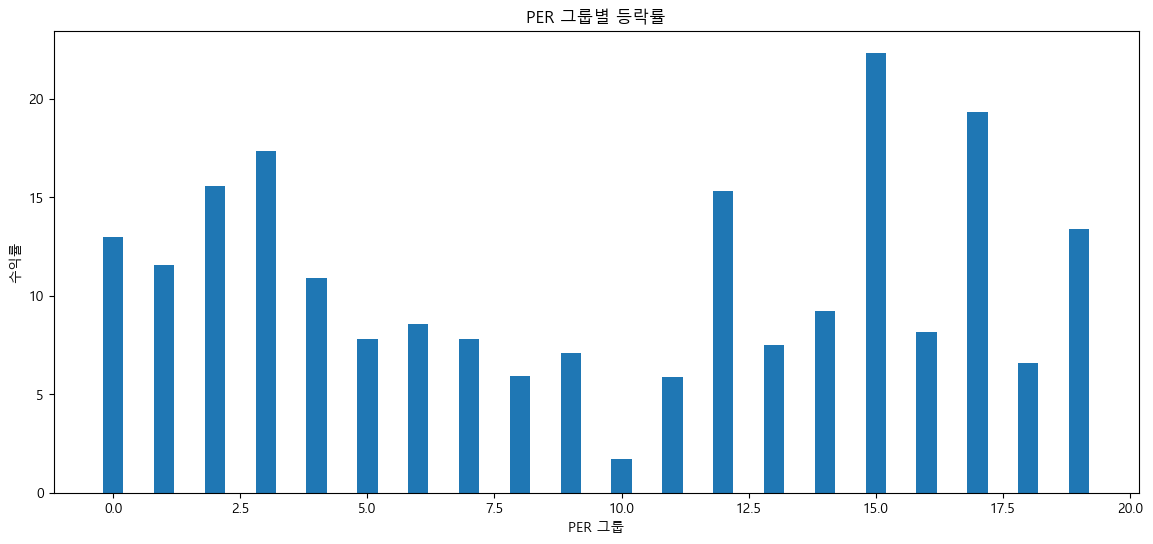

In [44]:
import matplotlib.pyplot as plt
import platform 

if platform.system() == "Darwin":
    plt.rc("font", family = "Apple Gothic")
else:
    plt.rc("font", family = "malgun Gothic")

plt.figure(figsize=(14,6))
plt.bar(df5.index, df5["등락률"], width=0.4)
plt.title("PER 그룹별 등락률")
plt.xlabel("PER 그룹")
plt.ylabel("수익률")
plt.show()
